In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd

# COMPARATIVO ZIGZAG MULTIPLICACION

In [52]:
df = pd.read_excel("graficos_orga2.xlsx", sheet_name="Sheet3")
df.columns = [ '32x16', '64x32', '128x64', '200x100', '256x128', '400x200', '512x256', '800x400', '1600x800', '32x16_Z1', '64x32_Z1', '128x64_Z1', '200x100_Z1', '256x128_Z1', '400x200_Z1', '512x256_Z1', '800x400_Z1', '1600x800_Z1', '32x16_Z2', '64x32_Z2', '128x64_Z2', '200x100_Z2', '256x128_Z2', '400x200_Z2', '512x256_Z2', '800x400_Z2', '1600x800_Z2']
print('El dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')
df.head()

El dataset tiene 50 filas, y 27 columnas


,32x16,64x32,128x64,200x100,256x128,400x200,512x256,800x400,1600x800,32x16_Z1,...,1600x800_Z1,32x16_Z2,64x32_Z2,128x64_Z2,200x100_Z2,256x128_Z2,400x200_Z2,512x256_Z2,800x400_Z2,1600x800_Z2
0,2053,5170,20909,40027,63255,217361,246642,609114,2676377,3601,...,5401390,2538,7433,28042,60907,98460,352674,400830,3183650,4002154
1,3252,5092,21037,40020,64965,151468,255181,601382,2651414,3470,...,5252407,4995,7355,29728,60675,97348,243553,393210,922396,3790907
2,5624,4874,27175,40206,64064,155509,388460,589496,3118435,3817,...,5346725,2802,7173,28687,60787,96792,229716,379837,922192,3779377
3,2395,5234,18505,39618,62906,149626,260946,620078,3192730,3748,...,5575716,2695,8099,27445,61060,98502,241819,666396,918367,3960236
4,2411,5200,18167,40381,73254,154948,255145,588891,2633007,4248,...,5286193,2648,6969,27534,61265,108450,236822,386576,970643,3874999


In [82]:
data=pd.melt(df, value_vars=[ '32x16', '64x32', '128x64', '200x100', '256x128', '400x200', '512x256', '800x400', '1600x800'], var_name='Size', value_name='Original')
data.to_csv("output.csv")
data.head()


,Size,Original
0,32x16,2053
1,32x16,3252
2,32x16,5624
3,32x16,2395
4,32x16,2411


In [83]:
df2 = pd.read_excel("graficos_orga2.xlsx", sheet_name="Sheet3")
df2.columns = [ '32x16_ZO', '64x32_ZO', '128x64_ZO', '200x100_ZO', '256x128_ZO', '400x200_ZO', '512x256_ZO', '800x400_ZO', '1600x800_ZO', '32x16', '64x32', '128x64', '200x100', '256x128', '400x200', '512x256', '800x400', '1600x800', '32x16_Z2', '64x32_Z2', '128x64_Z2', '200x100_Z2', '256x128_Z2', '400x200_Z2', '512x256_Z2', '800x400_Z2', '1600x800_Z2']

data2=pd.melt(df2, value_vars=[ '32x16', '64x32', '128x64', '200x100', '256x128', '400x200', '512x256', '800x400', '1600x800'], var_name='Size', value_name='Experimento 1')
data2.to_csv("output2.csv")
data2.head()

,Size,Experimento 1
0,32x16,3601
1,32x16,3470
2,32x16,3817
3,32x16,3748
4,32x16,4248


In [85]:
df3 = pd.read_excel("graficos_orga2.xlsx", sheet_name="Sheet3")
df3.columns = [ '32x16_ZO', '64x32_ZO', '128x64_ZO', '200x100_ZO', '256x128_ZO', '400x200_ZO', '512x256_ZO', '800x400_ZO', '1600x800_ZO', '32x16_Z1', '64x32_Z1', '128x64_Z1', '200x100_Z1', '256x128_Z1', '400x200_Z1', '512x256_Z1', '800x400_Z1', '1600x800_Z1', '32x16', '64x32', '128x64', '200x100', '256x128', '400x200', '512x256', '800x400', '1600x800']

data3=pd.melt(df3, value_vars=[ '32x16', '64x32', '128x64', '200x100', '256x128', '400x200', '512x256', '800x400', '1600x800'], var_name='Size', value_name='Experimento2')
data3.to_csv("output3.csv")
data3.head()

,Size,Experimento2
0,32x16,2538
1,32x16,4995
2,32x16,2802
3,32x16,2695
4,32x16,2648


In [94]:
df = pd.read_csv("zigzag_exp.csv")
df.columns = ['Size', 'Original', 'Experimento 1', 'Experimento2']
print('El dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')
df.head()

El dataset tiene 450 filas, y 4 columnas


,Size,Original,Experimento 1,Experimento2
0,32x16,2053,3601,2538
1,32x16,3252,3470,4995
2,32x16,5624,3817,2802
3,32x16,2395,3748,2695
4,32x16,2411,4248,2648


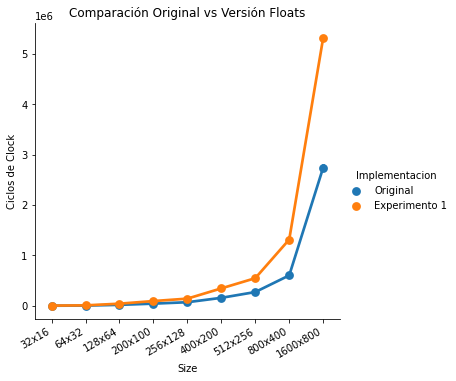

In [118]:
dfo = df[['Size','Original', 'Experimento 1']].copy()
data = dfo.melt('Size', var_name='Implementacion',  value_name='Ciclos de Clock')
g = sns.catplot(x="Size", y="Ciclos de Clock", hue='Implementacion', data=data, kind='point')
plt.title(F'Comparación Original vs Versión Floats')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-zigzag-mult-vs-float.png", bbox_inches='tight');
#data.head()

In [129]:
dfo = df[['Size','Original', 'Experimento2']].copy()
data = dfo.melt('Size', var_name='Implementacion',  value_name='Ciclos de Clock')
ax = sns.catplot(x="Size", y="Ciclos de Clock",hue='Implementacion', data=data, palette="Spectral",kind='point')
plt.title(F'Comparación Original vs Versión 2 Píxeles')
plt.setp(plt.xticks()[1], rotation=30, ha='right')
plt.savefig("graficos/filtro-zigzag-2-vs-4.png", bbox_inches='tight');
#data.head()

AttributeError: 'FacetGrid' object has no attribute 'set_xscale'